# Regression Example

This example uses real data - our Flush Valve Curves - to estimate the flush volume depending on input variables. 


See below for a list of supervisedregression and classification algorythms available in SKLearn:
https://scikit-learn.org/stable/supervised_learning.html


## Importing Data

I will be using the Pandas library to import a CSV of data.

https://pandas.pydata.org/docs/user_guide/index.html#user-guide

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Flush_Valve_Data.csv', sep=',')
df.head()

,Production Part number,Sample Number,Flush Valve Model Description,Comments,Configuration,Manual or Electronic,Bowl,Media Test,Test Request #,Test Tech/Eng,Actuatation Time,Targeted Volume,Static Pressure,Min Flowing Pressure,Peak Flow,Year,Month,Day,Measured Volume
0,81T201BTA-DF,11A374,Gen 3 Dual Flush,"dual flush modified solenoid open time, cap mo...",Water Closet,Electronic Battery,na,na,na,Dave Black,1.3,6.0,62.000000,0.000000,161.828771,2011,9,14,5.650558
1,81T201BTA-DF,11A374,Gen 3 Dual Flush,"dual flush modified solenoid open time, cap mo...",Water Closet,Electronic Battery,NaN,NaN,NaN,Dave Black,1.3,6.0,102.000000,0.000000,211.480168,2011,9,14,6.205147
2,81T201,11A375,Manual,New Seat and Guide 2.0,Water Closet,Manual,NaN,NaN,11-FV-101,Dave Arnold,1.0,6.0,20.712871,8.729207,42.884744,2011,9,15,1.640575
3,81T201,11A375,Manual,New Seat and Guide 2.0,Water Closet,Manual,NaN,CSA Volume,11-FV-101,Dave Arnold,1.0,6.0,74.320538,68.226474,184.942928,2011,9,15,6.372773
4,81T201,11A375,Manual,New Seat and Guide 2.0,Water Closet,Manual,NaN,CSA Volume,11-FV-101,Dave Arnold,1.0,6.0,48.680907,43.937132,146.559734,2011,9,15,5.585587


In [3]:
df.describe()

,Actuatation Time,Targeted Volume,Static Pressure,Min Flowing Pressure,Peak Flow,Year,Month,Day,Measured Volume
count,21609.000000,21806.000000,22041.000000,22041.000000,22041.000000,22041.000000,22041.000000,22041.000000,22041.000000
mean,1.275907,3.669976,44.494560,32.967393,74.628715,2016.208475,6.395762,15.201715,3.847905
std,5.304660,2.207855,25.906442,22.855349,48.314187,3.832869,3.503283,8.401941,4.332493
min,0.000000,0.500000,-37.495968,-37.517506,-0.045876,1900.000000,1.000000,1.000000,0.000000
25%,0.800000,1.900000,26.385417,22.883183,27.880441,2014.000000,3.000000,9.000000,1.480016
50%,1.000000,4.200000,35.052551,24.924241,92.970124,2015.000000,6.000000,14.000000,3.858506
75%,1.000000,4.800000,49.613563,33.490199,95.753198,2018.000000,10.000000,22.000000,4.884986
max,60.000000,13.200000,136.687074,131.160279,292.833006,2025.000000,12.000000,31.000000,176.614705


## Data Manipulation

There are a lot of features that are strings. Machine Learning and AI models need to do math on features so we need to convert these to numbers. We need to map strings to numerical equivalents. You can do this with a mapping dictionary or function if you have finite amount of differing strings. The easiest way to do this is to use an encoder.

We will use SKLearn's OrdinalEncoder

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder


This link goes into detail about other Encoder types, as well as feature binarization, discretization, and methods of imputing missing data in features.
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features


## Preparing Data ##

First, I want to split the matrix into 2 parts (X and y data tables). Then, I want to split the X data into 2 halves - one half that is made of features containing only numeric data and the other half that needs categorical/string values to be encoded to numeric. Then, I will recombine these halves back into an X array.

In [6]:
import numpy as np

raw_data =  df.to_numpy()

#split data into X
X_raw = raw_data[:,0:18]
y = raw_data[:,[18]]
y


array([[5.650557668],
       [6.205147172],
       [1.640574983],
       ...,
       [4.775068659],
       [4.285813776],
       [4.266866912]], dtype=object)

In [7]:
X_str = X_raw[:,0:10]
X_num = X_raw[:,10:18]

In [8]:
X_str

array([['81T201BTA-DF', '11A374', 'Gen 3 Dual Flush', ..., 'na', 'na',
        'Dave Black'],
       ['81T201BTA-DF', '11A374', 'Gen 3 Dual Flush', ..., nan, nan,
        'Dave Black'],
       ['81T201', '11A375', 'Manual', ..., nan, '11-FV-101',
        'Dave Arnold'],
       ...,
       ['81T201-48', '25FV006-01', 'Manual', ...,
        'Water Consumption Test', '25-FV-008', 'Riley Glew'],
       ['81T201-48', '25FV006-02', 'Manual', ...,
        'Water Consumption Test', '25-FV-008', 'Riley Glew'],
       ['81T201-48', '25FV006-02', 'Manual', ...,
        'Water Consumption Test', '25-FV-008', 'Riley Glew']],
      dtype=object)

In [9]:
X_num

array([[1.3, 6.0, 62.0, ..., 2011, 9, 14],
       [1.3, 6.0, 102.0, ..., 2011, 9, 14],
       [1.0, 6.0, 20.712871, ..., 2011, 9, 15],
       ...,
       [1.0, 4.8, 79.970145, ..., 2025, 1, 29],
       [1.0, 4.8, 35.137007, ..., 2025, 1, 29],
       [1.0, 4.8, 80.0338, ..., 2025, 1, 29]], dtype=object)

### Time to Encode ###

In [11]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) #sets enc as an object that contains all the funtions in Ordinal Encoder library
enc.fit(X_str) #applies the data we want encoded to the encoder

enc.transform(X_str)

array([[ 90.,  18., 129., ..., 136., 800.,  15.],
       [ 90.,  18., 129., ...,  nan,  nan,  15.],
       [ 62.,  19., 150., ...,  nan,   3.,  14.],
       ...,
       [ 68., 879., 150., ..., 127., 797.,  29.],
       [ 68., 880., 150., ..., 127., 797.,  29.],
       [ 68., 880., 150., ..., 127., 797.,  29.]])

In [12]:
#let's replace the NaNs with a value (or choose to remove the lines contains NaN altogether)
X_str_trans = enc.set_params(encoded_missing_value=-1).fit_transform(X_str)
X_str_trans

array([[ 90.,  18., 129., ..., 136., 800.,  15.],
       [ 90.,  18., 129., ...,  -1.,  -1.,  15.],
       [ 62.,  19., 150., ...,  -1.,   3.,  14.],
       ...,
       [ 68., 879., 150., ..., 127., 797.,  29.],
       [ 68., 880., 150., ..., 127., 797.,  29.],
       [ 68., 880., 150., ..., 127., 797.,  29.]])

In [13]:
X = np.hstack((X_str_trans, X_num))
X

array([[90.0, 18.0, 129.0, ..., 2011, 9, 14],
       [90.0, 18.0, 129.0, ..., 2011, 9, 14],
       [62.0, 19.0, 150.0, ..., 2011, 9, 15],
       ...,
       [68.0, 879.0, 150.0, ..., 2025, 1, 29],
       [68.0, 880.0, 150.0, ..., 2025, 1, 29],
       [68.0, 880.0, 150.0, ..., 2025, 1, 29]], dtype=object)

In [14]:
y

array([[5.650557668],
       [6.205147172],
       [1.640574983],
       ...,
       [4.775068659],
       [4.285813776],
       [4.266866912]], dtype=object)

## Training a Model

In [23]:
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=90, max_depth=10) 
model = model.fit(X, y)

In [24]:
# https://erhankilic.org/post/understanding-the-role-of-the-leaf-nodes-in-decision-trees/

model.get_n_leaves()

84

In [25]:
model.get_depth()

10

In [26]:
model.score(X,y)

0.5954279476396225

[Text(0.3104482323232323, 0.9545454545454546, 'x[11] <= 3.4\nsquared_error = 18.77\nsamples = 22041\nvalue = 3.848'),
 Text(0.04040404040404041, 0.8636363636363636, 'x[11] <= 0.85\nsquared_error = 1.844\nsamples = 8376\nvalue = 1.256'),
 Text(0.020202020202020204, 0.7727272727272727, 'x[16] <= 11.5\nsquared_error = 0.927\nsamples = 4056\nvalue = 0.578'),
 Text(0.010101010101010102, 0.6818181818181818, 'squared_error = 0.727\nsamples = 3880\nvalue = 0.546'),
 Text(0.030303030303030304, 0.6818181818181818, 'x[7] <= 15.0\nsquared_error = 6.288\nsamples = 176\nvalue = 1.288'),
 Text(0.020202020202020204, 0.5909090909090909, 'squared_error = 10.973\nsamples = 39\nvalue = 3.982'),
 Text(0.04040404040404041, 0.5909090909090909, 'x[2] <= 129.5\nsquared_error = 0.013\nsamples = 137\nvalue = 0.521'),
 Text(0.030303030303030304, 0.5, 'x[3] <= 104.0\nsquared_error = 0.118\nsamples = 61\nvalue = 0.44'),
 Text(0.020202020202020204, 0.4090909090909091, 'squared_error = -8.169\nsamples = 5\nvalue = 0.

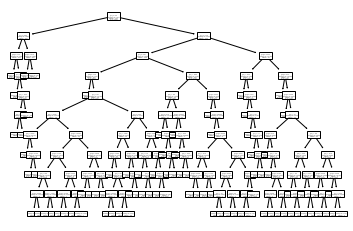

In [27]:
tree.plot_tree(model)

## Cross Validate

This gives us a clearer idea if the model can provide stable predictions by looking at the range of accuracy scores.

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores

array([ 0.31670484, -0.52862537,  0.3476319 ,  0.05022339,  0.43534508,
        0.11697763,  0.14372593,  0.38330626,  0.55718275,  0.22615069])

In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.20 accuracy with a standard deviation of 0.29


## Making Predictions ##



In [31]:
df = pd.read_csv('Predictions.csv', sep=',')
df.head()

,Production Part number,Sample Number,Flush Valve Model Description,Comments,Configuration,Manual or Electronic,Bowl,Media Test,Test Request #,Test Tech/Eng,Actuatation Time,Targeted Volume,Static Pressure,Min Flowing Pressure,Peak Flow,Year,Month,Day
0,81T201,25A278,Manual,CSA Volume,Water Closet,Manual,NaN,Water Consumption Test,NaN,Riley Glew,1,4.8,34,22,96,2025,2,7


In [32]:
pred_raw_data =  df.to_numpy()
X_pred_str = pred_raw_data[:,0:10]
X_pred_num = pred_raw_data[:,10:18]

In [33]:
X_pred_str

array([['81T201', '25A278', 'Manual', 'CSA Volume', 'Water Closet',
        'Manual', nan, 'Water Consumption Test', nan, 'Riley Glew']],
      dtype=object)

In [34]:
X_pred_str_trans = enc.transform(X_pred_str)

In [35]:
X_pred_str_trans

array([[ 62.,  -1., 150.,  -1.,  20.,   7.,  -1., 127.,  -1.,  29.]])

In [36]:
X_pred = np.hstack((X_pred_str_trans, X_pred_num))
X_pred

array([[62.0, -1.0, 150.0, -1.0, 20.0, 7.0, -1.0, 127.0, -1.0, 29.0, 1,
        4.8, 34, 22, 96, 2025, 2, 7]], dtype=object)

In [37]:
model.predict(X_pred)

array([4.65321909])

In [38]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)